# Data Summary and Businesss Problem

- Insert the data descriptions and the link etc.

# Model Prep

In [45]:
# load packages here
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.api as smg
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.linear_model import LinearRegression

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

# set seed
import random
random.seed(5600)

In [17]:
#Load in the data and store it as ride

ride_full = pd.read_csv('../../02_project/data/rideshare_subset.csv')
ride_full = ride_full.dropna()
ride_full.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,4.577000e+03,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,...,4577.000000,4.577000e+03,4577.000000,4.577000e+03,4577.000000,4.577000e+03,4577.000000,4.577000e+03,4577.000000,4.577000e+03
mean,1.544055e+09,11.725803,17.716627,11.592528,16.577671,2.218396,1.014475,42.338177,-71.065831,39.674381,...,0.037227,1.544052e+09,33.445040,1.544050e+09,45.325078,1.544056e+09,29.743240,1.544056e+09,42.088986,1.544056e+09
std,6.892093e+05,6.960787,9.947628,0.491418,9.070030,1.132395,0.097195,0.048034,0.020318,6.851340,...,0.055250,6.911293e+05,6.539092,6.902815e+05,5.691830,6.901182e+05,7.148098,6.875209e+05,6.982644,6.909731e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.030000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.860000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543445e+09,6.000000,13.000000,11.000000,9.500000,1.340000,1.000000,42.350300,-71.081000,36.270000,...,0.000000,1.543421e+09,28.900000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543746e+09,12.000000,17.000000,12.000000,14.000000,2.210000,1.000000,42.351900,-71.063100,40.680000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543748e+09,41.380000,1.543788e+09
75%,1.544831e+09,18.000000,28.000000,12.000000,22.500000,2.960000,1.000000,42.364700,-71.054200,43.610000,...,0.091600,1.544807e+09,38.940000,1.544789e+09,47.060000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545160e+09,23.000000,30.000000,12.000000,62.500000,7.460000,2.500000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


- ADD SOME COMMENTS

In [18]:
#There is a lot of columns that we really do not need so we will trim downn the dataset 
columns_to_keep = ['price', 'hour', 'distance', 'surge_multiplier', 'apparentTemperature', 'name']

ride = ride_full[columns_to_keep]
ride.head()

,price,hour,distance,surge_multiplier,apparentTemperature,name
0,11.0,14,3.07,1.00,33.90,Lyft
1,8.0,13,1.89,1.00,42.13,UberPool
2,11.0,0,1.74,1.25,39.94,Lyft
3,14.0,21,1.50,1.00,38.55,UberXL
4,22.5,21,3.21,1.00,41.62,Lux


In [19]:
#get the dummies for categorical data

ride_dummies = pd.get_dummies(data = ride, drop_first= True, dtype= int)
ride_dummies.columns

Index(['price', 'hour', 'distance', 'surge_multiplier', 'apparentTemperature',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV'],
      dtype='object')

### Refference Columns
- Name_Black

# EDA

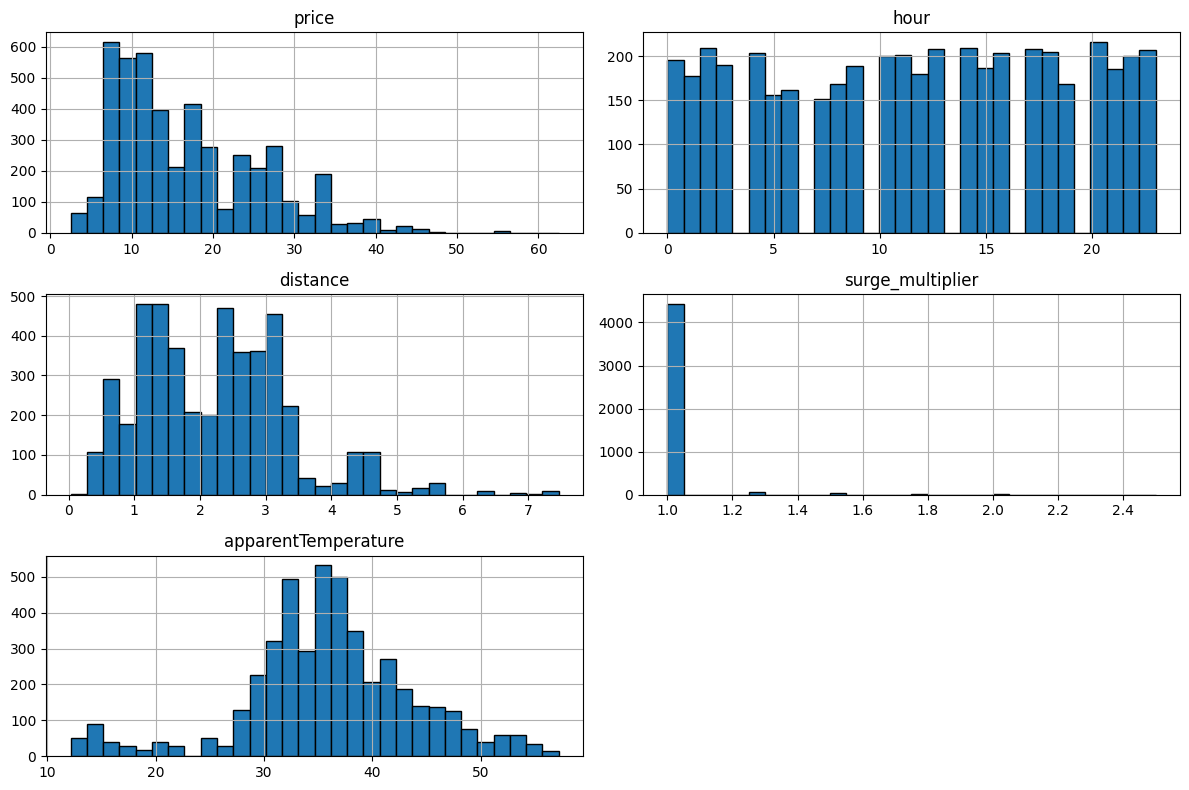

In [20]:
# Create histograms for each numerical column
ride.hist(figsize=(12, 8), bins=30, edgecolor='black')

plt.tight_layout() 
plt.show()

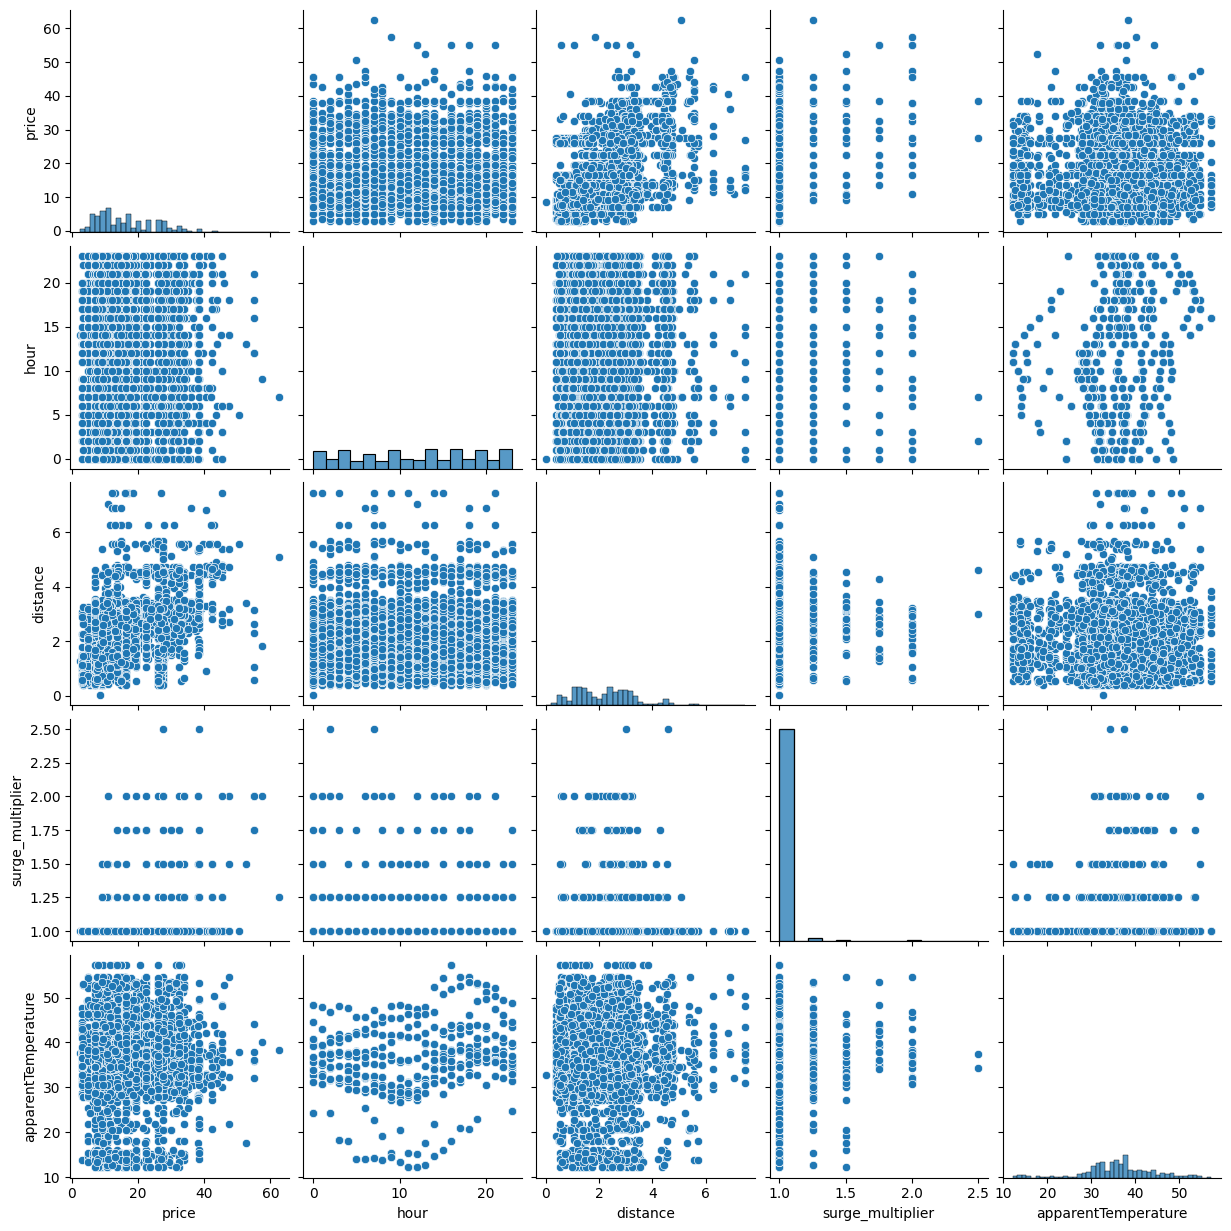

In [21]:
sns.pairplot(ride)

- ADD SOME COMMENTS

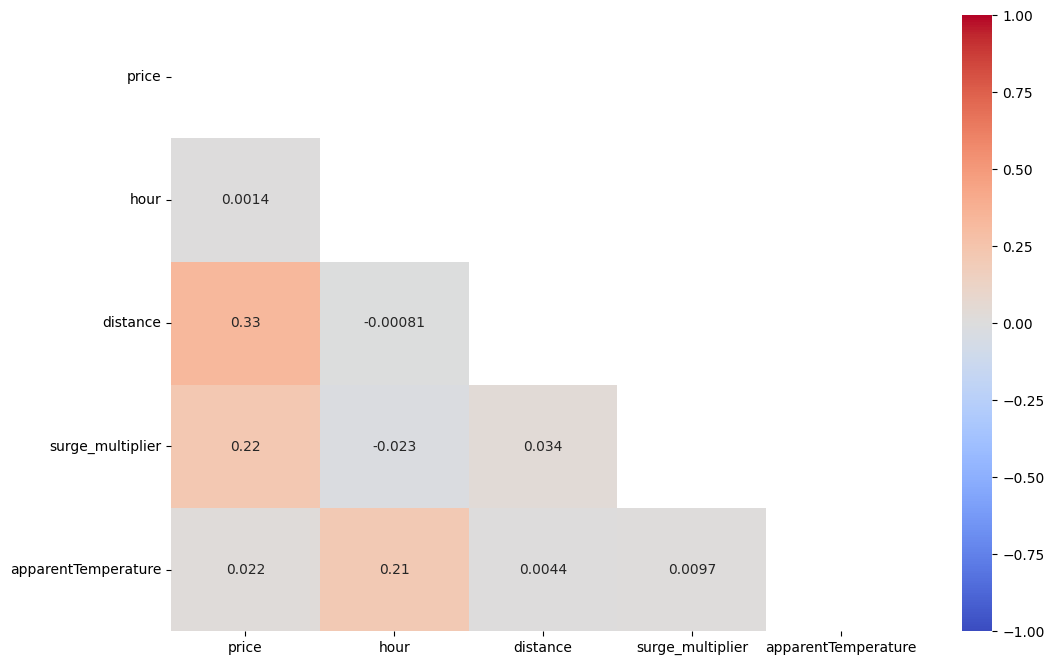

In [22]:
# Compute correlation matrix once
corr_matrix = ride.select_dtypes(include=['number']).corr()

# Set figure size before plotting
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(corr_matrix, 
            cmap='coolwarm',  # Color palette
            annot=True,  # Show correlation values
            vmin=-1, vmax=1,  # Normalize color scale
            mask=np.triu(corr_matrix))  # Hide upper triangle

plt.show()

- ADD SOME COMMENTS

# Baseline Model

In [23]:
y = ride_dummies['price']
X = sm.add_constant(ride_dummies.iloc[:, 1:16]) 
mod = sm.OLS(y, X)
res = mod.fit()

ride_dummies['residuals'] = res.resid
ride_dummies['fittedvalues'] = res.fittedvalues

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     4091.
Date:                Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:01:41   Log-Likelihood:                -10473.
No. Observations:                4577   AIC:                         2.098e+04
Df Residuals:                    4561   BIC:                         2.108e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.6840      0.423     -6.346      0.000      -3.513      -1.855
hour                    0.0040      0.005      0.761      0.447      -0.006       0.014
distance                2.7191      0.031     87.035      0.000       2.658       2.780
surge_multiplier       16.7737      0.370     45.312      0.000      16.048      17.499
apparentTemperature     0.0039      0.004      0.879      0.380      -0.005       0.013
name_Black SUV         10.1809      0.171     59.512      0.000       9.845      10.516
name_Lux               -3.0350      0.172    -17.611      0.000      -3.373      -2.697
name_Lux Black          2.2999      0.169     13.598      0.000       1.968       2.631
name_Lux Black XL      11.2106      0.173     64.672      0.000      10.871      11.550
name_Lyft             -11.1618      0.175    -63.958      0.000     -11.504     -10.820
name_Lyft XL           -5.5065      0.171    -32.185      0.000      -5.842      -5.171
name_Shared           -13.9644      0.174    -80.428      0.000     -14.305     -13.624
name_UberPool         -11.4830      0.170    -67.666      0.000     -11.816     -11.150
name_UberX            -10.7134      0.167    -64.018      0.000     -11.041     -10.385
name_UberXL            -4.6672      0.169    -27.634      0.000      -4.998      -4.336
name_WAV              -10.5004      0.168    -62.485      0.000     -10.830     -10.171
==============================================================================
Omnibus:                     1407.985   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13471.258
Skew:                           1.187   Prob(JB):                         0.00
Kurtosis:                      11.062   Cond. No.                         604.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regularization and Variable Selection

### Sequential Replacement

In [24]:
seqrep_selection = SFS(LinearRegression(fit_intercept = True), 
                                        k_features = (1, len(X.columns)), 
                                        forward = True, 
                                        floating = True,
                                        scoring = 'neg_mean_squared_error',
                                        cv = 5)

seqrep = seqrep_selection.fit(X, y)

print('Sequential Replacement Stepwise Selection:', seqrep.k_feature_names_)

Sequential Replacement Stepwise Selection: ('distance', 'surge_multiplier', 'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV')


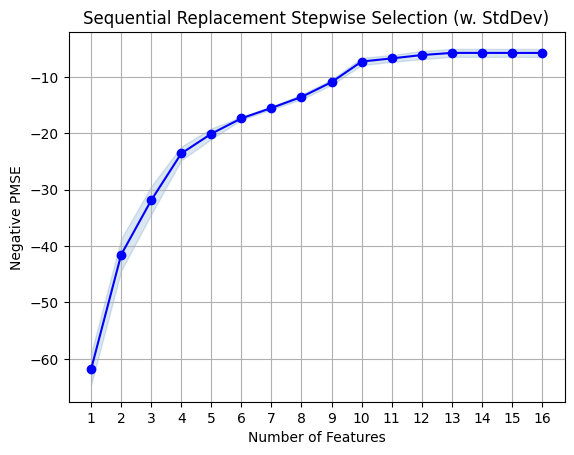

In [25]:
# Code to plot the (negative) PMSEs
fig1 = plot_sfs(seqrep.get_metric_dict(), kind = 'std_dev')
plt.title('Sequential Replacement Stepwise Selection (w. StdDev)')
plt.ylabel("Negative PMSE")
plt.grid()
plt.show()

In [26]:
# Code to see the next best models
seqrep_results = pd.DataFrame.from_dict(seqrep.get_metric_dict()).T
seqrep_results_sorted = seqrep_results.sort_values(by = 'avg_score', ascending = False)
seqrep_results_sorted.head(10)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
13,"(2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)","[-5.895364274318575, -5.130346417705383, -6.84...",-5.748426,"(distance, surge_multiplier, name_Black SUV, n...",0.905344,0.704389,0.352194
14,"(0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)","[-5.895364274318605, -5.1303464177053755, -6.8...",-5.748426,"(const, distance, surge_multiplier, name_Black...",0.905344,0.704389,0.352194
15,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[-5.899522645334266, -5.1289896991679, -6.8406...",-5.750634,"(const, hour, distance, surge_multiplier, name...",0.907761,0.706269,0.353135
16,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-5.905175183352535, -5.139777634871151, -6.84...",-5.755541,"(const, hour, distance, surge_multiplier, appa...",0.907456,0.706032,0.353016
12,"(2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15)","[-6.3440603869360865, -5.4687426996693755, -7....",-6.132847,"(distance, surge_multiplier, name_Black SUV, n...",0.917728,0.714023,0.357012
11,"(2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 15)","[-7.121242516892541, -6.17328750051487, -7.616...",-6.726705,"(distance, surge_multiplier, name_Black SUV, n...",0.779283,0.606309,0.303154
10,"(2, 3, 5, 7, 8, 9, 11, 12, 13, 15)","[-7.637819805418806, -6.6875622943314355, -8.2...",-7.28189,"(distance, surge_multiplier, name_Black SUV, n...",0.827682,0.643965,0.321983
9,"(2, 3, 5, 7, 8, 9, 11, 12, 13)","[-11.56513758192045, -10.105005738213123, -10....",-10.942653,"(distance, surge_multiplier, name_Black SUV, n...",0.620756,0.482969,0.241484
8,"(2, 3, 5, 7, 8, 9, 11, 12)","[-14.344451546388987, -13.100700392091646, -13...",-13.557407,"(distance, surge_multiplier, name_Black SUV, n...",0.54186,0.421585,0.210793
7,"(2, 3, 5, 7, 8, 11, 12)","[-15.734037224116376, -15.105294804222396, -15...",-15.509702,"(distance, surge_multiplier, name_Black SUV, n...",0.321894,0.250444,0.125222


- ADD COMMENTS

### Elastic Net

In [27]:
# Create a list of possible alphas
potential_alphas = np.logspace(-4, 2, 500)

# run cross-validation to find the best alpha and l1_ratio
ElasticNetCV_model = ElasticNetCV(alphas = potential_alphas, 
                                  cv = 5, 
                                  random_state = 12345, 
                                  max_iter = 10000, 
                                  fit_intercept = True)
ElasticNetCV_model.fit(X, y)

# Get the list of alphas and corresponding MSEs
alphas = ElasticNetCV_model.alphas_
pmse_means = np.mean(ElasticNetCV_model.mse_path_, axis = 1)
pmse_std_error = np.std(ElasticNetCV_model.mse_path_, 
                        axis = 1,
                        ddof = 1) / np.sqrt(5)  # 5-fold CV

# Find the alpha that minimizes MSE
alpha_index_min = np.argmin(pmse_means)
alpha_min = alphas[alpha_index_min]

# Find the MSE that is one standard error away from the minimum MSE
one_se_above_min = min(pmse_means) + pmse_std_error[alpha_index_min]

# Find the largetst alpha with MSE less than or equal to one_se_above_min
alpha_index_1se = np.where(pmse_means <= one_se_above_min)[0][0]
alpha_1se = alphas[alpha_index_1se]

print("Minimum alpha:", alpha_min)
print("One SE alpha:", alpha_1se)

Minimum alpha: 0.0001433219225503574
One SE alpha: 0.005388438442608223


In [28]:
# Elastic Net results with lambda within one SE of the mean
en_1se = ElasticNet(alpha = alpha_1se,
                     fit_intercept = True)
en_1se.fit(X, y)

# Get coefficients
print(list(zip(en_1se.coef_, X)))

[(0.0, 'const'), (0.0031843643199991685, 'hour'), (2.719076964149906, 'distance'), (12.669255009518624, 'surge_multiplier'), (0.005083162654911792, 'apparentTemperature'), (10.933367639676622, 'name_Black SUV'), (-1.6654080734133014, 'name_Lux'), (3.424772522095725, 'name_Lux Black'), (12.036382142962916, 'name_Lux Black XL'), (-9.476738941948353, 'name_Lyft'), (-4.015484917764677, 'name_Lyft XL'), (-12.353249720944081, 'name_Shared'), (-9.986605670403291, 'name_UberPool'), (-9.257996755672341, 'name_UberX'), (-3.384179923060878, 'name_UberXL'), (-9.04602377904843, 'name_WAV')]


### Variable Selection Summary

- List the variables selected and a summary as to why

# Rerun the Model With Best Variables Selected

In [36]:
#Create a new subset dataframe with the best vars chosen
# Define the variables selected from Feature Set 9
selected_columns = [
    'price', 'distance', 'surge_multiplier', 
    'name'
]

# One-hot encode the 'name' column
ride_dummies = pd.get_dummies(ride_subset_9, columns=['name'], drop_first=True, dtype=int)

# Manually filter for only the desired columns
desired_columns = [
    'price', 'distance', 'surge_multiplier', 
    'name_Black SUV', 'name_Lux', 'name_Lux Black', 
    'name_Lux Black XL', 'name_Shared', 'name_UberPool', 'name_UberX'
]


# Keep only the desired columns (dropping any extra ones)
ride_dummies = ride_dummies[[col for col in desired_columns if col in ride_dummies.columns]]

# Create a new subset DataFrame
ride_subset_9 = ride_full[selected_columns]


# Define dependent and independent variables
y = ride_dummies['price']
X = sm.add_constant(ride_dummies.drop(columns=['price']))  # Add constant term for OLS

In [37]:
#re-fit the model with the selected vars
mod = sm.OLS(y, X)
res = mod.fit()

# Store residuals and fitted values in the DataFrame
ride_dummies['residuals'] = res.resid
ride_dummies['fittedvalues'] = res.fittedvalues

# Print regression summary
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     2740.
Date:                Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:06:30   Log-Likelihood:                -12338.
No. Observations:                4577   AIC:                         2.470e+04
Df Residuals:                    4567   BIC:                         2.476e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.2579      0.57

## Assumptions

### Insert all assumptions here below

### The X's vs Y are linear 

/Users/tysonmerrill/.pyenv/versions/3.12.4/lib/python3.12/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


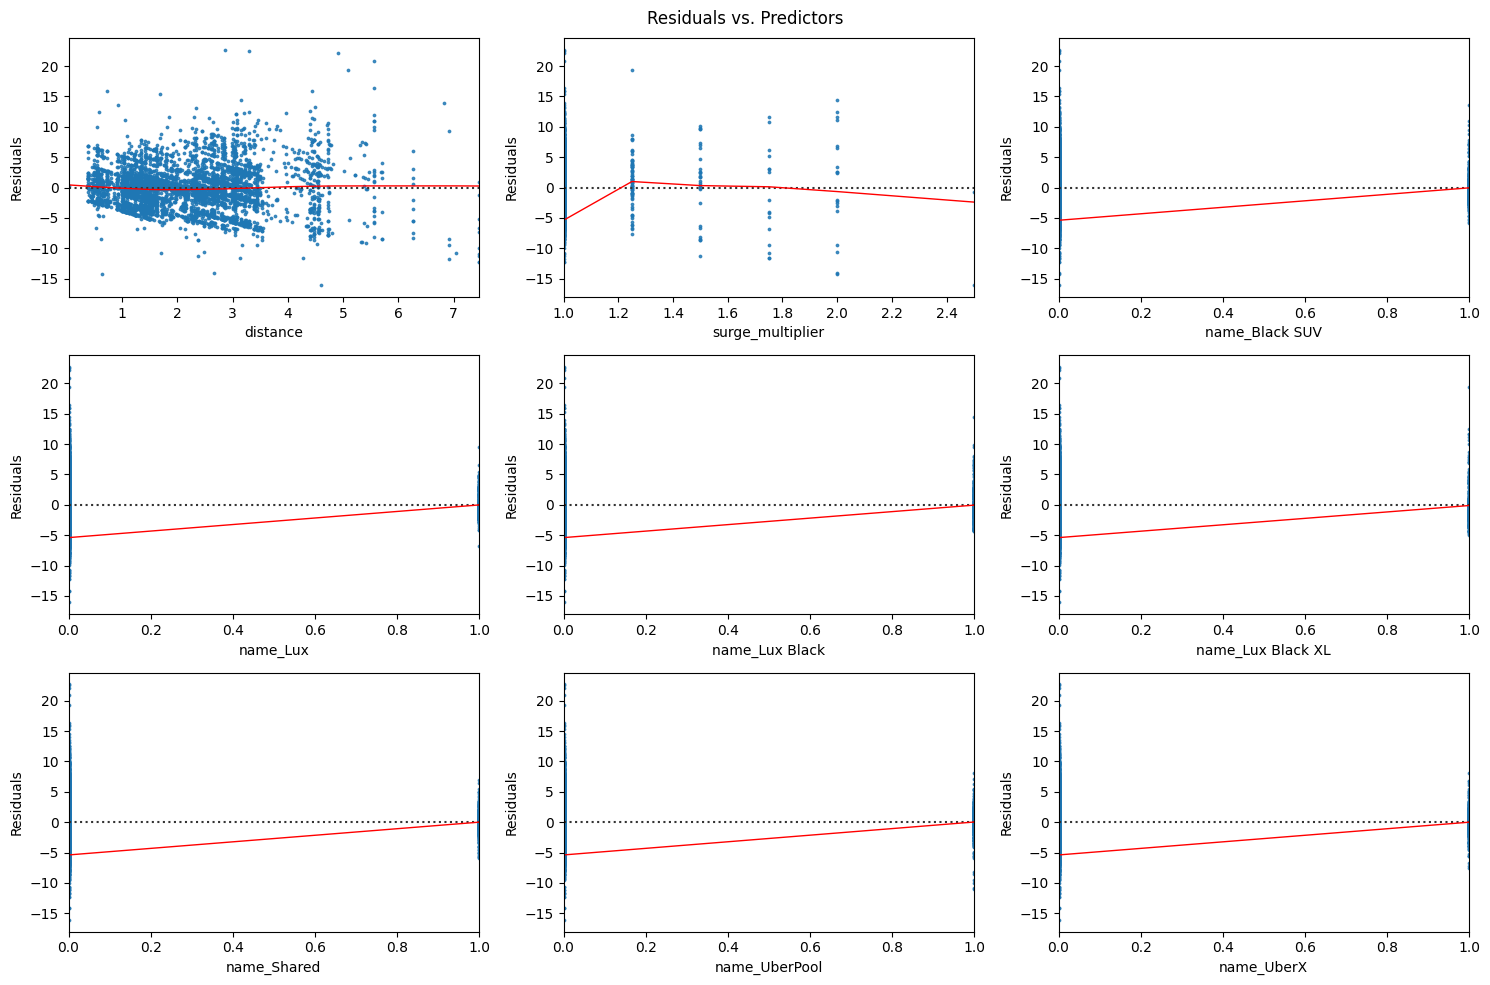

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot residuals vs. predictors
def res_vs_pred(variable, ax):
    sns.residplot(x=ride_dummies[variable], 
                  y=ride_dummies['residuals'],
                  lowess=True,
                  scatter_kws={'s': 3},
                  line_kws={'color': 'red', 'lw': 1},
                  ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel("Residuals")

# Define full list of predictors to plot
predictors = [
    'distance', 'surge_multiplier', 
    'name_Black SUV', 'name_Lux', 'name_Lux Black',
    'name_Lux Black XL', 'name_Shared', 
    'name_UberPool', 'name_UberX'
]

# Set up subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
plt.suptitle("Residuals vs. Predictors")

# Loop through predictors and assign to subplots
for ax, predictor in zip(axes.flatten(), predictors):
    if predictor in ride_dummies.columns:  # Ensure the variable exists before plotting
        res_vs_pred(predictor, ax)
    else:
        ax.set_visible(False)  # Hide subplot if variable is missing

fig.tight_layout()
plt.show()


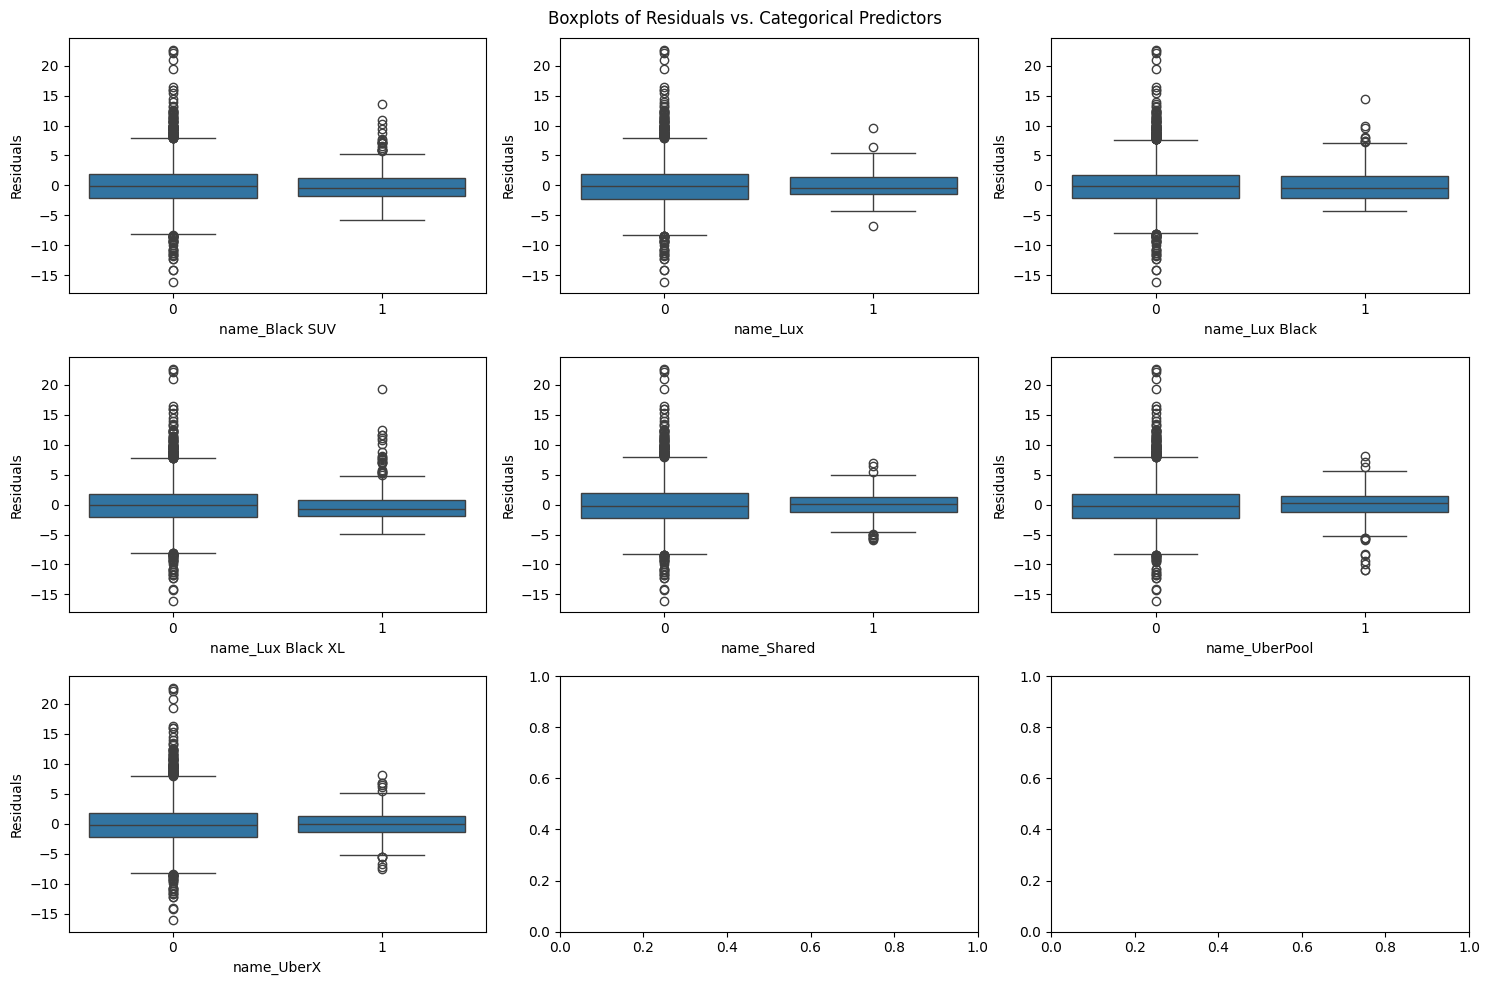

In [46]:

# Function to create box plot for categorical variables
def boxplot_residuals(variable, ax):
    sns.boxplot(x=ride_dummies[variable], 
                y=ride_dummies['residuals'], 
                ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel("Residuals")

# List of categorical predictors
categorical_predictors = [
    'name_Black SUV', 'name_Lux', 'name_Lux Black',
    'name_Lux Black XL', 'name_Shared', 
    'name_UberPool', 'name_UberX'
]

# Set up subplots for categorical predictors
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
plt.suptitle("Boxplots of Residuals vs. Categorical Predictors")

# Loop through categorical predictors and assign to subplots
for ax, predictor in zip(axes.flatten(), categorical_predictors):
    if predictor in ride_dummies.columns:  # Ensure the variable exists before plotting
        boxplot_residuals(predictor, ax)
    else:
        ax.set_visible(False)  # Hide subplot if variable is missing

fig.tight_layout()
plt.show()


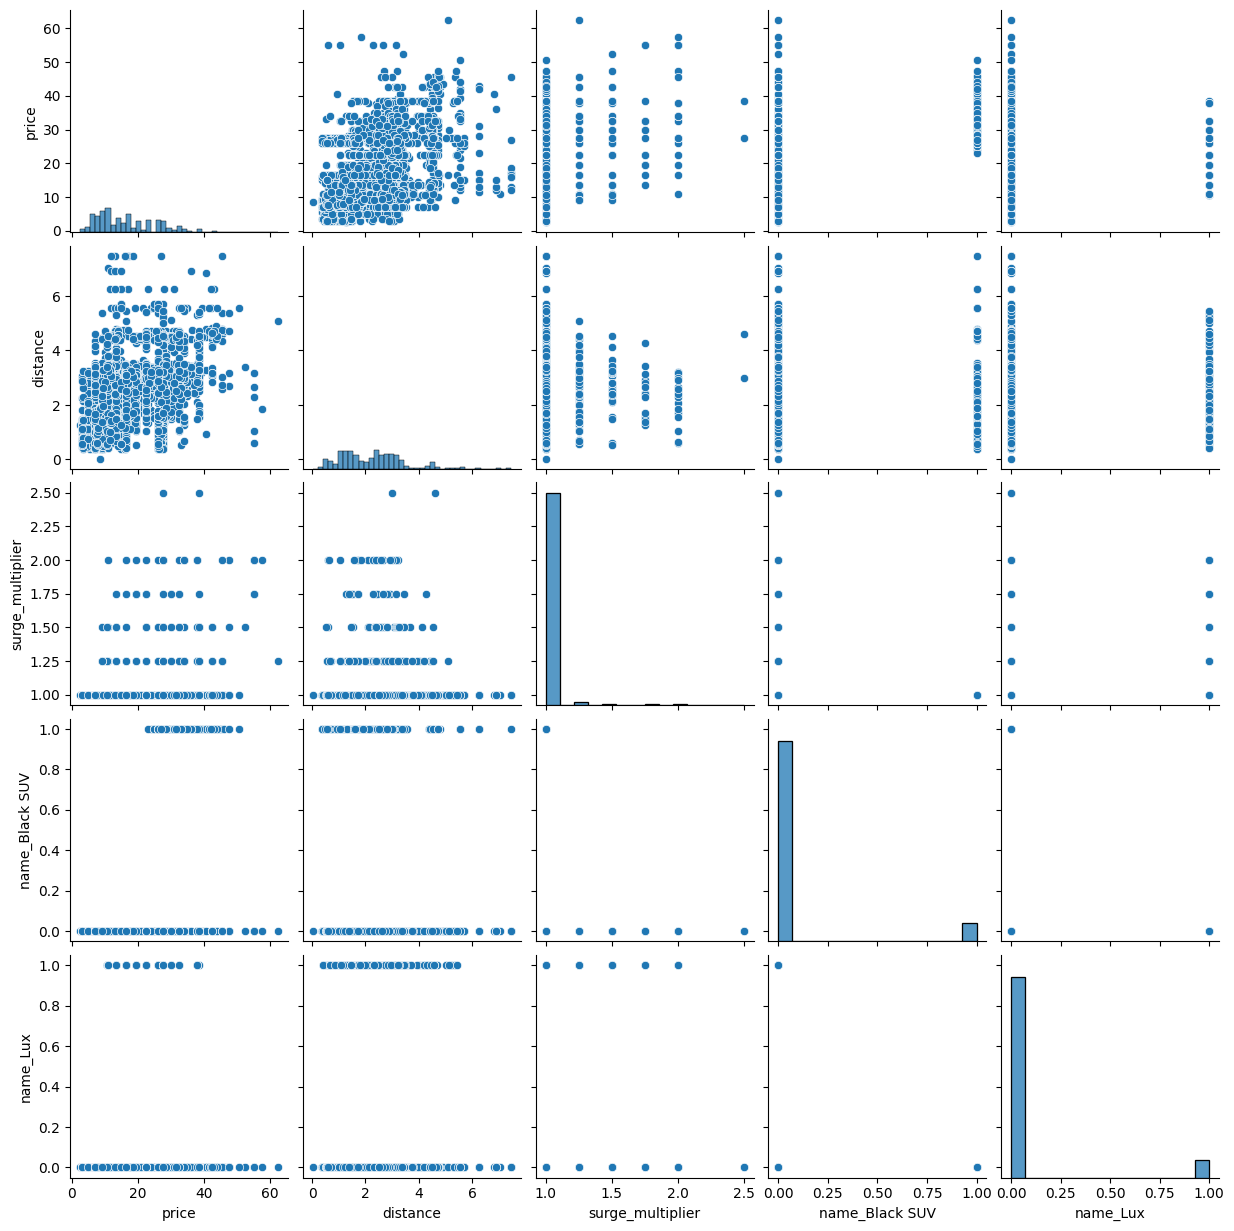

In [48]:

# Generate a scatterplot matrix
sns.pairplot(ride_dummies[['price', 'distance', 'surge_multiplier', 
                           'name_Black SUV', 'name_Lux']])
plt.show()


### The residuals are independent 

The residuals are independent. The data was collected randomly and then a subset was chosen from that data that records driving information for random Taxi service trips.

#### The residuals are normally distributed and centered at zero (use all four diagnostic tools). [2 points]

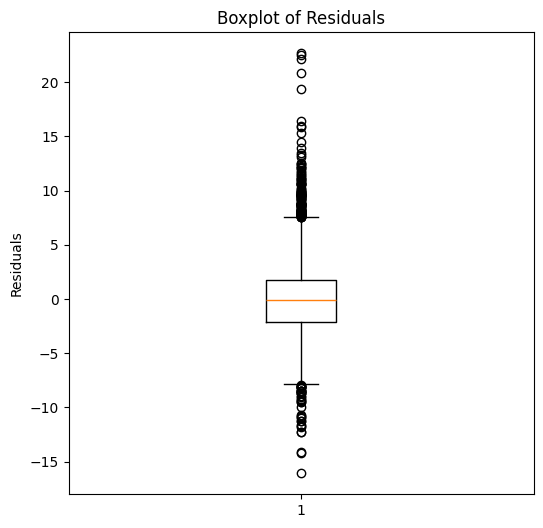

In [49]:
# Boxplot of residuals
fig = plt.figure(figsize=(6, 6))
plt.boxplot(ride_dummies['residuals'])  # Use the residuals from your model
plt.ylabel("Residuals")
plt.title("Boxplot of Residuals")
plt.show()


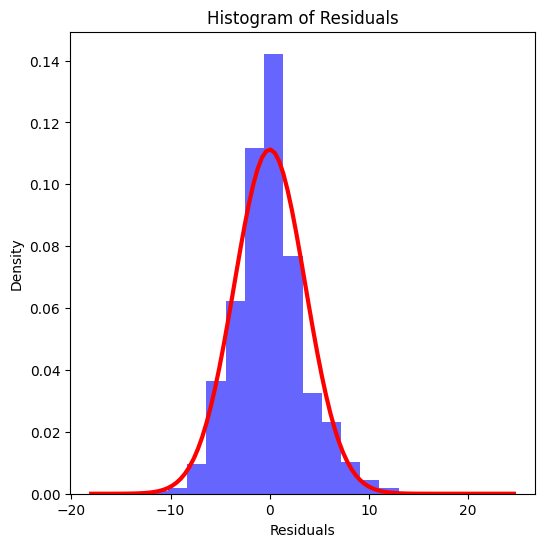

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Histogram of residuals from your model
fig = plt.figure(figsize=(6, 6))

# Plot histogram (density = True so that it's on the same scale as the normal distribution)
plt.hist(ride_dummies['residuals'],  # Use residuals from the model
         density=True, 
         bins=20,  # Adjust the number of bins if necessary
         alpha=0.6, color='blue')

# Labeling the axes
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Histogram of Residuals")

# Calculate mean and standard deviation
mean = np.mean(ride_dummies['residuals'])  # Mean of residuals
sd = np.std(ride_dummies['residuals'])  # Standard deviation of residuals

# Generate x values to plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Plot normal distribution curve
plt.plot(x, 
         stats.norm.pdf(x, mean, sd), 
         color='red', lw=3)  # Red line for normal distribution

# Show 
plt.show()

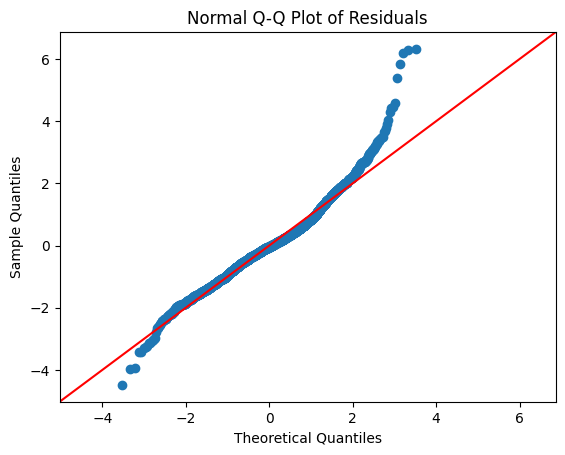

In [51]:
# Q-Q Plot (Normal Probability Plot) for residuals from your model
sm.qqplot(ride_dummies['residuals'],  # Use residuals from the model
          line='45', 
          fit=True)

plt.title("Normal Q-Q Plot of Residuals")
plt.show()

#### The residuals have equal/constant variance across all values of X (only one diagnostic tool). [2 points]

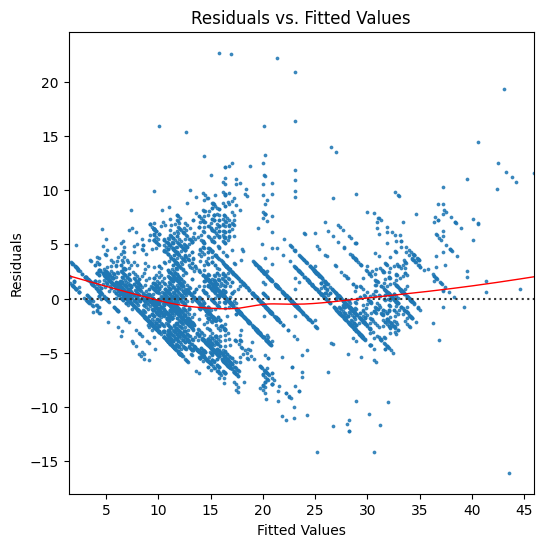

In [52]:

# Residuals vs. Fitted Values plot
fig = plt.figure(figsize=(6, 6))
sns.residplot(x=ride_dummies['fittedvalues'], 
              y=ride_dummies['residuals'],  
              lowess=True,
              scatter_kws={'s': 3},
              line_kws={'color': 'red', 'lw': 1})

# Labels and title
plt.title("Residuals vs. Fitted Values")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.show()


#### The model describes all observations (i.e., there are no influential points) (use the DFBETAS and DFFITS). [2 points]

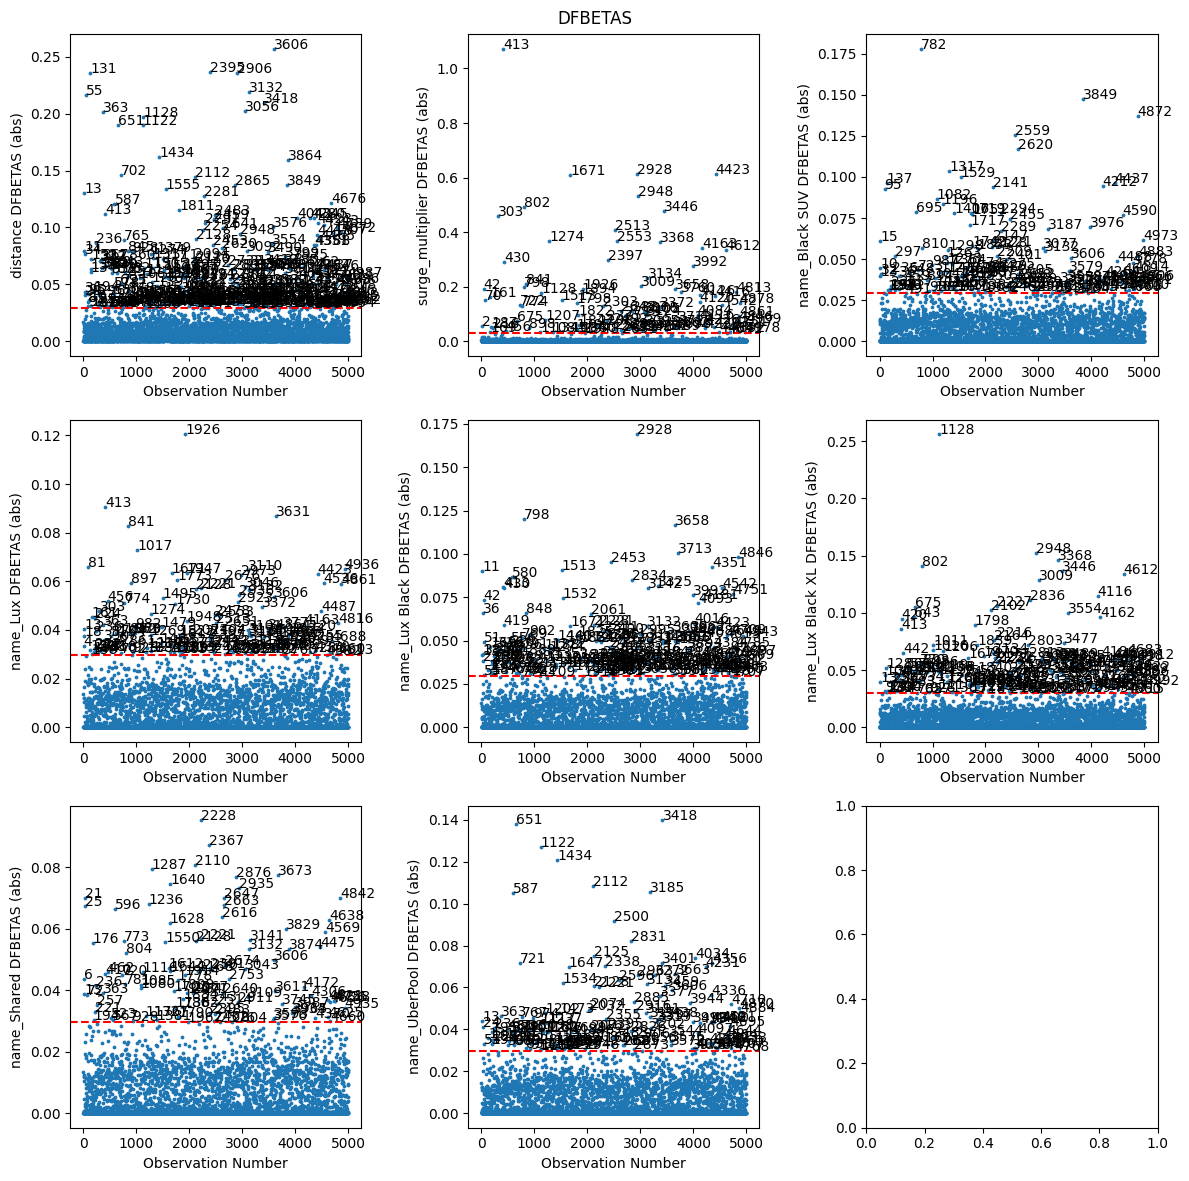

In [56]:
# Function to plot DFBETAS
def plot_dfbetas(column, ax, label_level=2 / np.sqrt(len(ride_dummies))):
    # Get the index of the column in the model's features (exclude the 'price' column)
    idx = ride_dummies.columns.get_loc(column)
    
    # Calculate DFBETAS for the column
    ride_dummies['dfbetas_' + column] = res.get_influence().dfbetas[:, idx]

    # Plot DFBETAS values
    ax.set_ylabel(f"{column} DFBETAS (abs)")
    ax.set_xlabel("Observation Number")
    ax.scatter(ride_dummies.index, np.abs(ride_dummies['dfbetas_' + column]), s=3)
    ax.axhline(y=label_level, color='r', linestyle='dashed')

    # Optional: label outliers
    outliers = ride_dummies[np.abs(ride_dummies['dfbetas_' + column]) > label_level]
    for i in list(outliers.index):
        ax.annotate(str(i), (i, np.abs(ride_dummies['dfbetas_' + column][i])))

# Create subplots (Updated grid size to accommodate all variables)
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # Now it's 3x3 to handle 8 plots
plt.suptitle("DFBETAS")

# Call the plot_dfbetas function for each of the desired columns
plot_dfbetas("distance", axes[0, 0])
plot_dfbetas("surge_multiplier", axes[0, 1])
plot_dfbetas("name_Black SUV", axes[0, 2])
plot_dfbetas("name_Lux", axes[1, 0])
plot_dfbetas("name_Lux Black", axes[1, 1])
plot_dfbetas("name_Lux Black XL", axes[1, 2])
plot_dfbetas("name_Shared", axes[2, 0])
plot_dfbetas("name_UberPool", axes[2, 1])

# Adjust layout and display the plot
fig.tight_layout()
plt.show()


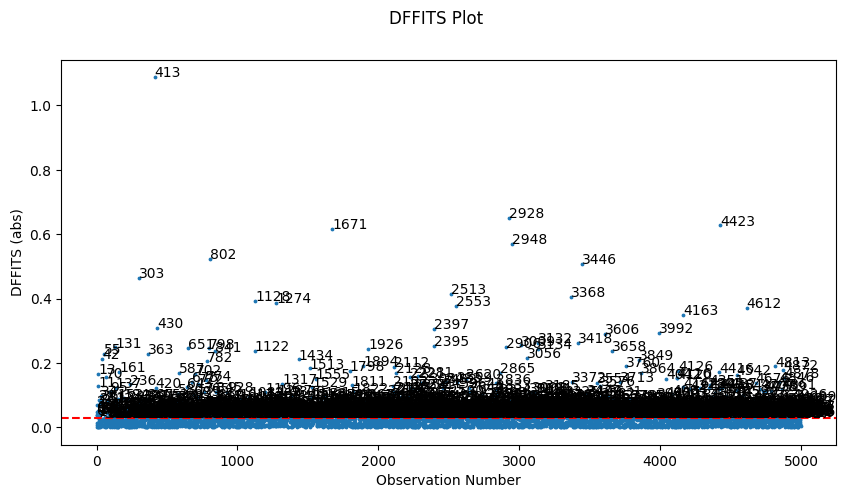

In [57]:
# DFFITS
def plot_dffits(ax, label_level=2 * np.sqrt(len(ride_dummies)) / len(ride_dummies)):
    # Calculate DFFITS for all observations
    ride_dummies["dffits"] = res.get_influence().dffits[0]

    # Plot DFFITS values
    ax.set_ylabel("DFFITS (abs)")
    ax.set_xlabel("Observation Number")
    ax.scatter(ride_dummies.index, np.abs(ride_dummies["dffits"]), s=3)
    ax.axhline(y=label_level, color='r', linestyle='dashed')

    # Optional: label outliers
    outliers = ride_dummies[np.abs(ride_dummies["dffits"]) > label_level]
    for i in list(outliers.index):
        ax.annotate(str(i), (i, np.abs(ride_dummies["dffits"][i])))

# Create figure
fig, ax = plt.subplots(figsize=(10, 5))
plt.suptitle("DFFITS Plot")

# Plot DFFITS
plot_dffits(ax)

plt.show()


In [65]:
# Create a dictionary to store the DFBETAS outliers
outliers_dfbetas_all = {}

# Iterate over each of the selected predictors and check DFBETAS values
for column in desired_columns[1:]:  # Skip 'price' column, as it's the dependent variable
    # Calculate the DFBETAS for each predictor (use res from your OLS model)
    idx = ride_dummies.columns.get_loc(column)
    ride_dummies['dfbetas_' + column] = res.get_influence().dfbetas[:, idx]
    
    # Identify outliers based on the DFBETAS threshold (label_level)
    outliers_dfbetas_all[column] = ride_dummies[np.abs(ride_dummies['dfbetas_' + column]) > 0.2 / np.sqrt(len(ride_dummies))]
    
# Example for 'dfbetas_distance'
outliers_dfbetas_all['distance'].sort_values(by='dfbetas_distance', ascending=True).head()


,price,distance,surge_multiplier,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Shared,name_UberPool,name_UberX,...,fittedvalues,dfbetas_distance,dfbetas_surge_multiplier,dfbetas_name_Black SUV,dfbetas_name_Lux,dfbetas_name_Lux Black,dfbetas_name_Lux Black XL,dfbetas_name_Shared,dfbetas_name_UberPool,dffits
2906,16.0,7.46,1.0,0,0,0,0,0,0,0,...,28.238189,-0.235839,0.016517,0.028808,0.031797,0.032967,0.031195,0.028081,0.035907,-0.248557
131,16.0,7.46,1.0,0,0,0,0,0,0,0,...,28.238189,-0.235839,0.016517,0.028808,0.031797,0.032967,0.031195,0.028081,0.035907,-0.248557
55,17.0,7.46,1.0,0,0,0,0,0,0,0,...,28.238189,-0.216524,0.015164,0.026449,0.029193,0.030267,0.028640,0.025781,0.032966,-0.228201
3418,12.0,7.46,1.0,0,0,0,0,0,1,0,...,22.976378,-0.209157,0.007001,-0.002608,0.000935,0.001053,0.000620,-0.002610,-0.139811,-0.261485
3056,15.0,6.91,1.0,0,0,0,0,0,0,0,...,26.754043,-0.202603,0.015055,0.027935,0.030401,0.031511,0.029859,0.027238,0.034075,-0.216146


In [64]:
# Calculate DFFITS for selected predictors
ride_dummies['dffits'] = res.get_influence().dffits[0]

# Outlier detection based on DFFITS for selected predictors
outliers_dffits = ride_dummies[np.abs(ride_dummies['dffits']) > 2 * np.sqrt(len(res.params) / len(ride_dummies))]

# Filter out only the rows with selected predictors and DFFITS
outliers_dffits_selected = outliers_dffits[desired_columns + ['dffits']]

# Sort outliers by DFFITS value in ascending order
outliers_dffits_sorted = outliers_dffits_selected.sort_values(by='dffits', ascending=True)

# Display the top outliers for selected predictors
outliers_dffits_sorted.head()


,price,distance,surge_multiplier,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Shared,name_UberPool,name_UberX,dffits
413,27.5,4.60,2.5,0,0,0,0,0,0,0,-1.087881
4423,11.0,0.64,2.0,0,0,0,0,0,0,0,-0.627397
1671,16.5,2.66,2.0,0,0,0,0,0,0,0,-0.616209
303,19.5,2.49,2.0,0,0,0,0,0,0,0,-0.465264
2513,22.5,3.17,2.0,0,0,0,0,0,0,0,-0.414994


#### Additional predictor variables are not required 

The dataset was very comprehensive. We beleive that this assumption is met. The variables we have are tested and important. And we started with possibly every predictor possible.

#### No multicollinearity: for this assumption, compute the variance inflation factors (VIFs) and compare the VIFs to your comments in questions 5. Do the variance inflation factors match your assumptions from questions 5? Is this assumption met? [2 points]

In [60]:
selected_columns = [
    'distance', 'surge_multiplier', 
    'name_Black SUV', 'name_Lux', 'name_Lux Black', 
    'name_Lux Black XL', 'name_Shared', 'name_UberPool', 'name_UberX'
]

# Create a subset with the selected columns (including constant term)
X_selected = sm.add_constant(ride_dummies[selected_columns])

vif_data = pd.DataFrame()
vif_data['Feature'] = X_selected.columns  # The names of the features
vif_data['VIF'] = [vif(X_selected.values, i) for i in range(X_selected.shape[1])]  # Calculate VIF for each feature

# Display max and mean VIF
print("Max VIF = ", max(vif_data['VIF']))
print("Mean VIF = ", np.mean(vif_data['VIF']))

# Show the VIF DataFrame
print(vif_data)

Max VIF =  115.92142636330539
Mean VIF =  12.563029439467027
             Feature         VIF
0              const  115.921426
1           distance    1.002482
2   surge_multiplier    1.015884
3     name_Black SUV    1.098116
4           name_Lux    1.096397
5     name_Lux Black    1.101282
6  name_Lux Black XL    1.094282
7        name_Shared    1.093687
8      name_UberPool    1.100836
9         name_UberX    1.105902


## Applying Transformations for unmet assumptions

Don't need?

## Check interactions and apply them if needed

In [ ]:
#interactions

# Model Assesments

## $R^2$

In [67]:
r_squared = res.rsquared
print(f"R-squared: {r_squared}")

R-squared: 0.843721514783896


## F-Test

In [68]:
f_statistic = res.fvalue
f_p_value = res.f_pvalue

print(f"F-statistic: {f_statistic}, p-value: {f_p_value}")

F-statistic: 2739.6080448521047, p-value: 0.0


## RMSE

In [71]:
residuals = res.resid

rmse = np.sqrt(np.mean(residuals**2))
print(f"RMSE: {rmse}")

RMSE: 3.585179064483643


## MAE

In [72]:
mae = np.mean(np.abs(residuals))
print(f"MAE: {mae}")


MAE: 2.647521756943202


# Statistical inference

### hypothesis tests for all slopes

In [ ]:
#hypothesis tests

 - you can group these together as "significant" or "not" in your interpretation

### confidence intervals for all slopes

- take extra care in providing accurate interpretations if your model includes an interaction term

### confidence interval for the mean of  $ Y $


- you cannot plot this, so pick specific values for the predictors to use and then interpret

### prediction interval for an individual observation

- you cannot plot this, so pick specific values for the predictors to use and then interpret

# Summary and Next Steps